In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("C:\\Users\\hp\\Desktop\\Data Science\\Datasets\\USA_Housing.csv")
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [4]:
data.isnull().sum()/len(data)*100

Avg. Area Income                0.0
Avg. Area House Age             0.0
Avg. Area Number of Rooms       0.0
Avg. Area Number of Bedrooms    0.0
Area Population                 0.0
Price                           0.0
Address                         0.0
dtype: float64

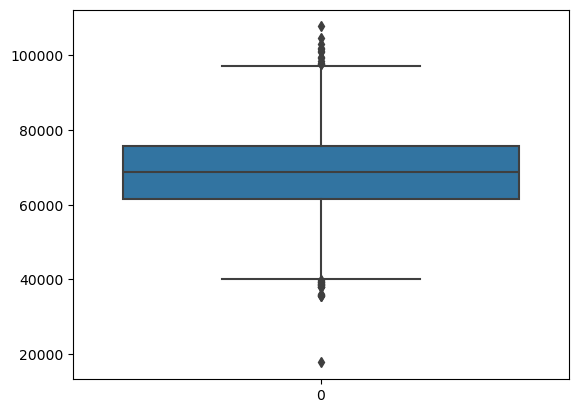

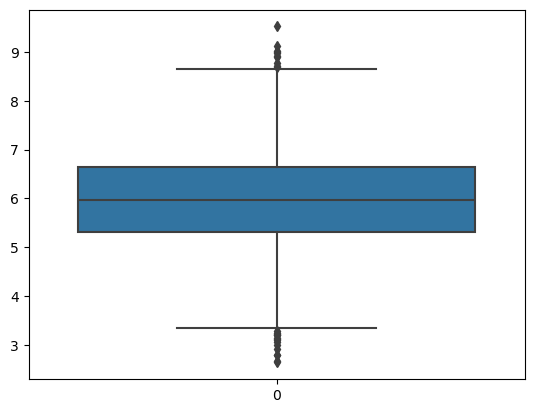

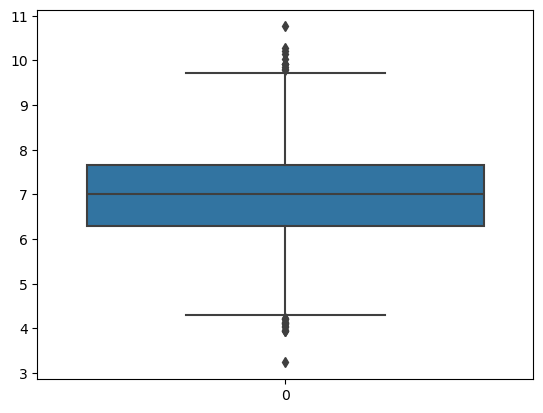

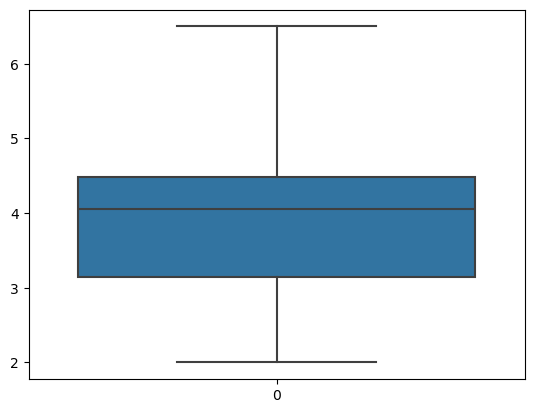

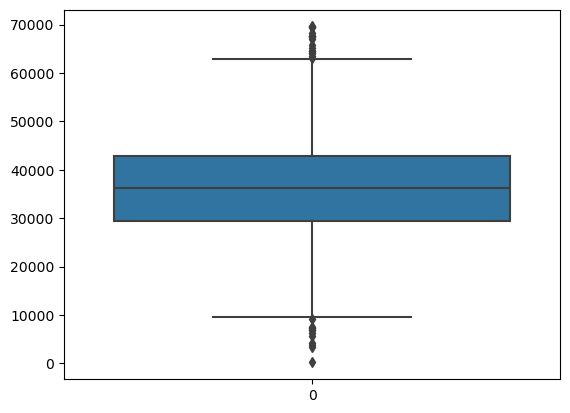

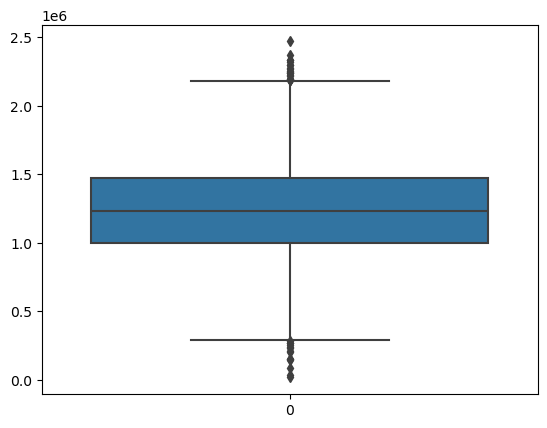

In [5]:
#Check Outlier
def boxplots(col):
    sns.boxplot(data[col])
    plt.show()
    
for i in list(data.select_dtypes(exclude=['object']).columns)[0:]:
    boxplots(i)

In [6]:
data.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [7]:
data['Address'][0]

'208 Michael Ferry Apt. 674\nLaurabury, NE 37010-5101'

In [8]:
data['Address'][1]

'188 Johnson Views Suite 079\nLake Kathleen, CA 48958'

In [9]:
data['Address'] = data['Address'].astype('category')
data['Address'] = data['Address'].cat.codes

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   int16  
dtypes: float64(6), int16(1)
memory usage: 244.3 KB


In [11]:
data['Address'].nunique()

5000

In [12]:
#Whether Address columns is significant or not
#Check the p-value
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('Price ~ Address', data=data).fit()
anova_result = sm.stats.anova_lm(model, typ=2)
print(anova_result)

                sum_sq      df         F    PR(>F)
Address   4.729103e+10     1.0  0.379215  0.538051
Residual  6.232883e+14  4998.0       NaN       NaN


In [13]:
data = data.drop(['Address'], axis=1)

In [14]:
data

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05
...,...,...,...,...,...,...
4995,60567.94414,7.830362,6.137356,3.46,22837.36103,1.060194e+06
4996,78491.27543,6.999135,6.576763,4.02,25616.11549,1.482618e+06
4997,63390.68689,7.250591,4.805081,2.13,33266.14549,1.030730e+06
4998,68001.33124,5.534388,7.130144,5.44,42625.62016,1.198657e+06


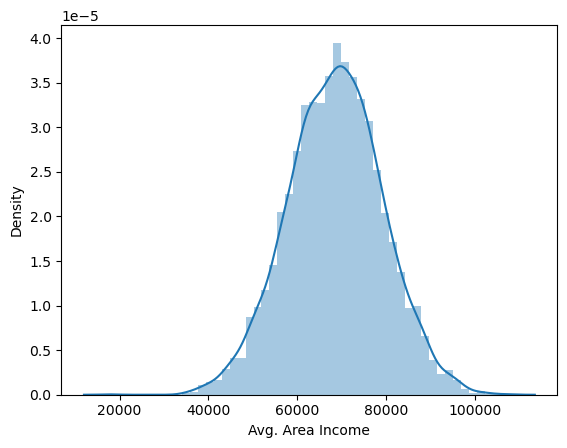

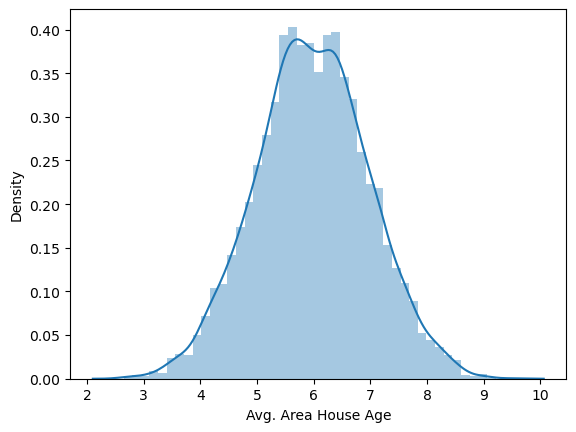

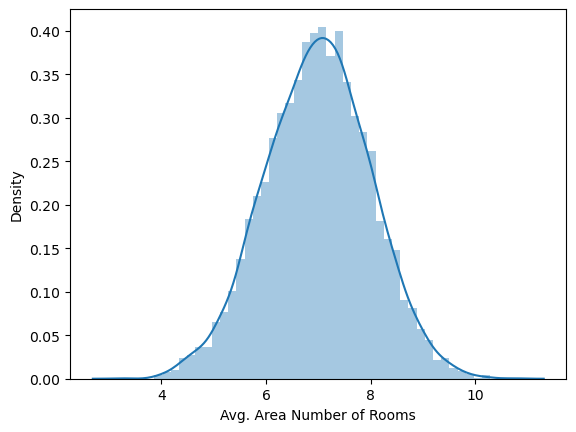

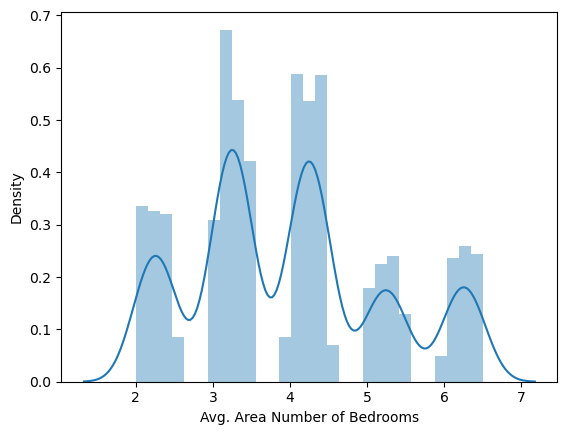

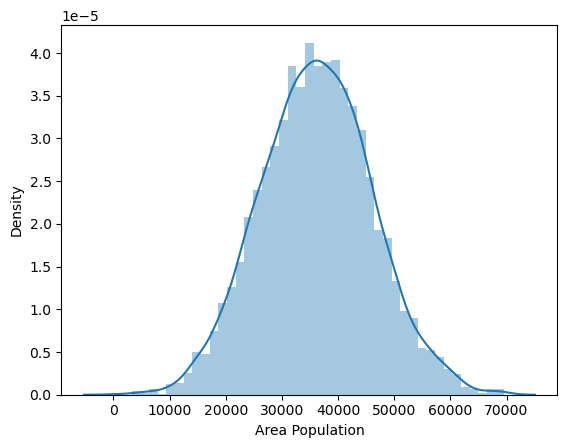

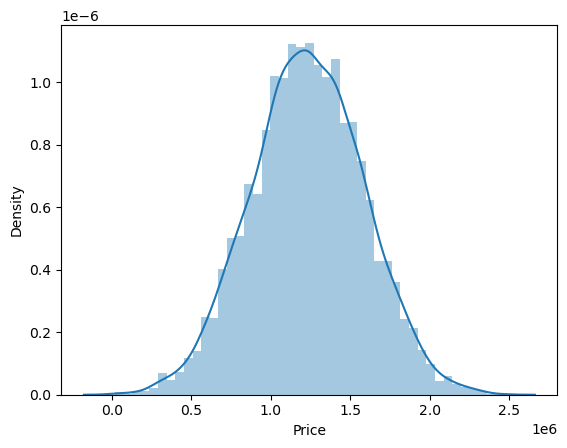

In [15]:
def distplots(col):
    sns.distplot(data[col])
    plt.show()

for i in list(data.columns)[0:]:
    distplots(i)

# Outlier Treatment is a mandatory Whenever we do linear regression model

In [16]:
income_Q1 = data['Avg. Area Income'].quantile(0.25)
income_Q3 = data['Avg. Area Income'].quantile(0.75)
income_iqr = income_Q3 - income_Q1

upper_income = income_Q3 + 1.5* income_iqr
lower_income = income_Q1 - 1.5* income_iqr

In [17]:
data.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

In [18]:
data['Avg. Area Income'] = np.where(data['Avg. Area Income'] > upper_income, upper_income, 
                                    np.where(data['Avg. Area Income']< lower_income, lower_income,
                                   data['Avg. Area Income']))

In [19]:
age_Q1 = data['Avg. Area House Age'].quantile(0.25)
age_Q3 = data['Avg. Area House Age'].quantile(0.75)
age_iqr = age_Q3 - age_Q1

upper_age = age_Q3 + 1.5* age_iqr
lower_age = age_Q1 - 1.5* age_iqr

In [20]:
data['Avg. Area House Age'] = np.where(data['Avg. Area House Age'] > upper_age, upper_age, 
                                    np.where(data['Avg. Area House Age']< lower_age, lower_age,
                                   data['Avg. Area House Age']))

In [21]:
room_Q1 = data['Avg. Area Number of Rooms'].quantile(0.25)
room_Q3 = data['Avg. Area Number of Rooms'].quantile(0.75)
room_iqr = room_Q3 - room_Q1

upper_room = room_Q3 + 1.5* room_iqr
lower_room = room_Q1 - 1.5* room_iqr

In [22]:
data['Avg. Area Number of Rooms'] = np.where(data['Avg. Area Number of Rooms'] > upper_room, upper_room, 
                                    np.where(data['Avg. Area Number of Rooms']< lower_room, lower_room,
                                   data['Avg. Area Number of Rooms']))

In [23]:
pop_Q1 = data['Area Population'].quantile(0.25)
pop_Q3 = data['Area Population'].quantile(0.75)
pop_iqr = pop_Q3 - pop_Q1

upper_pop = pop_Q3 + 1.5* pop_iqr
lower_pop = pop_Q1 - 1.5* pop_iqr

In [24]:
data['Area Population'] = np.where(data['Area Population'] > upper_pop, upper_pop, 
                                    np.where(data['Area Population']< lower_pop, lower_pop,
                                   data['Area Population']))

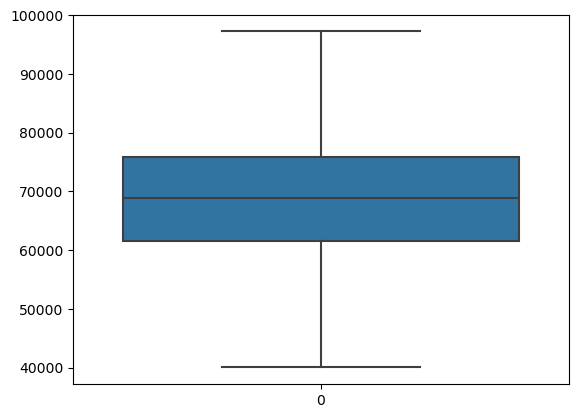

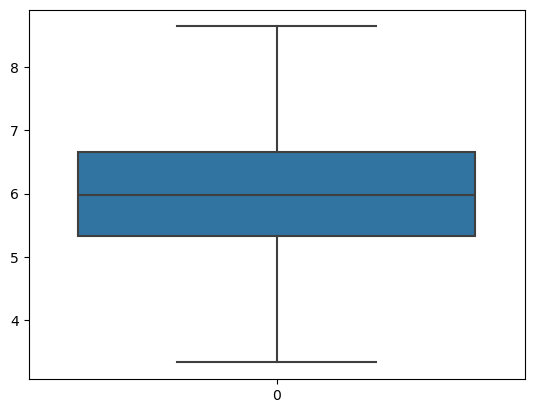

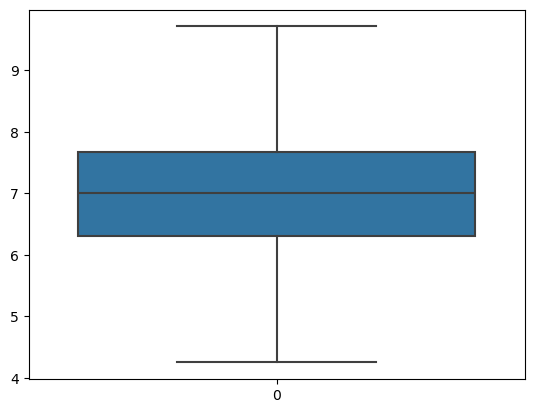

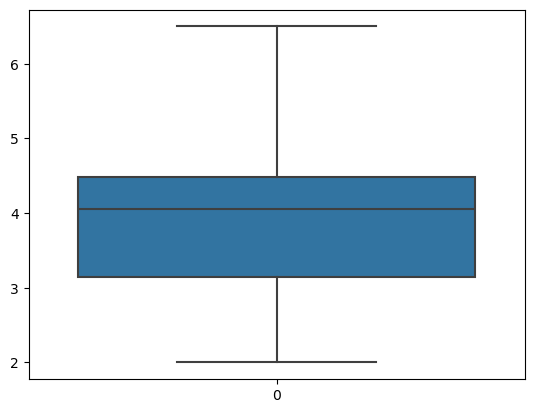

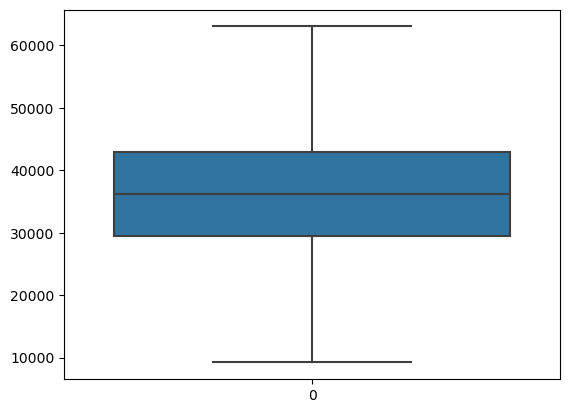

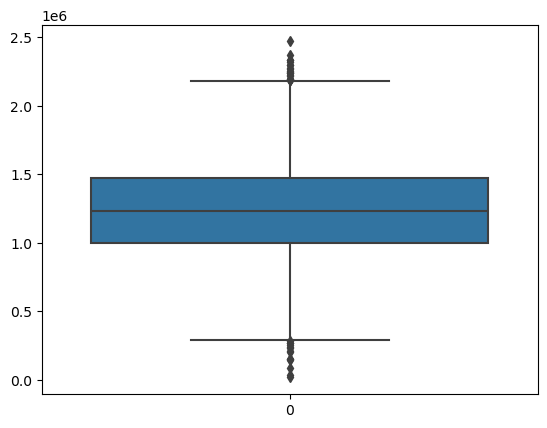

In [25]:
#Check Outlier
def boxplots(col):
    sns.boxplot(data[col])
    plt.show()
    
for i in list(data.select_dtypes(exclude=['object']).columns)[0:]:
    boxplots(i)

# Feature Scalling

In [26]:
data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68585.636250,5.977490,6.987624,3.981330,36159.070769,1.232073e+06
std,10592.080045,0.986995,1.001847,1.234137,9862.221143,3.531176e+05
min,40026.397978,3.329495,4.249318,2.000000,9217.885595,1.593866e+04
25%,61480.562390,5.322283,6.299250,3.140000,29403.928700,9.975771e+05
50%,68804.286405,5.970429,7.002902,4.050000,36199.406690,1.232669e+06
75%,75783.338665,6.650808,7.665871,4.490000,42861.290770,1.471210e+06
max,97237.503077,8.643597,9.715803,6.500000,63047.333875,2.469066e+06


In [27]:
# Make Note :- When you are using Gradient Descent 100% feature scalling is requried 
# For OLS you have to check model is performing is better with or without feature scalling and take action accordingly

#split the data into dependent and independent 

x = data.drop(['Price'], axis=1)
y = data[['Price']]

In [28]:
y.head()

,Price
0,1.059034e+06
1,1.505891e+06
2,1.058988e+06
3,1.260617e+06
4,6.309435e+05


In [29]:
x.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.45857,5.682861,7.009188,4.09,23086.80050
1,79248.64245,6.002900,6.730821,3.09,40173.07217
2,61287.06718,5.865890,8.512727,5.13,36882.15940
3,63345.24005,7.188236,5.586729,3.26,34310.24283
4,59982.19723,5.040555,7.839388,4.23,26354.10947


In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)

In [31]:
pd.DataFrame(x_scaler).head()

,0,1,2,3,4
0,1.034822,-0.298541,0.021527,0.088062,-1.325622
1,1.006797,0.025747,-0.256355,-0.722301,0.407049
2,-0.689128,-0.113082,1.522445,0.930840,0.073326
3,-0.494796,1.226822,-1.398453,-0.584540,-0.187484
4,-0.812333,-0.949376,0.850279,0.201513,-0.994293


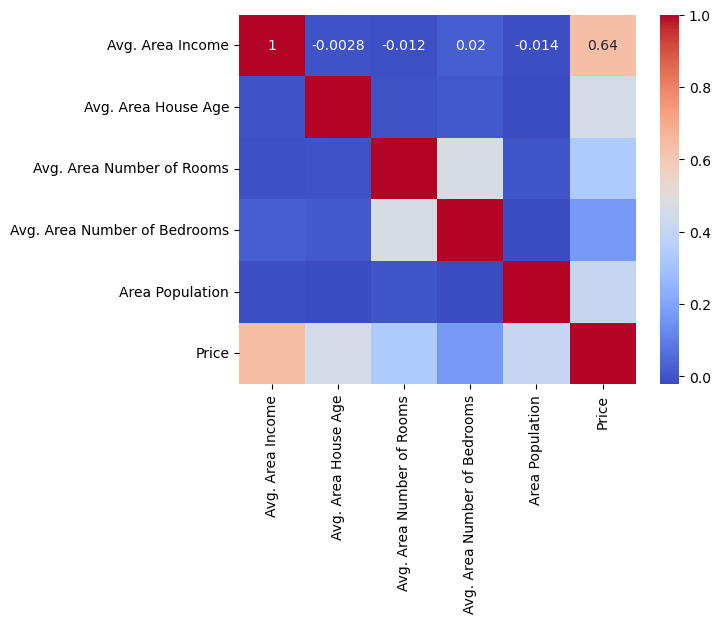

In [32]:
sns.heatmap(data.corr(), annot = True, cmap = 'coolwarm')
plt.show()

# Variation Inflation Factor (VIF)

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [34]:
variable = x_scaler

vif = pd.DataFrame()

vif['Variance Inflation factor'] = [variance_inflation_factor(variable , i)
                                    for i in range(variable.shape[1])]
                                    
vif['Features'] = x.columns

In [35]:
vif

,Variance Inflation factor,Features
0,1.001132,Avg. Area Income
1,1.000586,Avg. Area House Age
2,1.275347,Avg. Area Number of Rooms
3,1.276196,Avg. Area Number of Bedrooms
4,1.001172,Area Population


In [36]:
#Duplicate
data.duplicated().sum()

0

# Advanced EDA

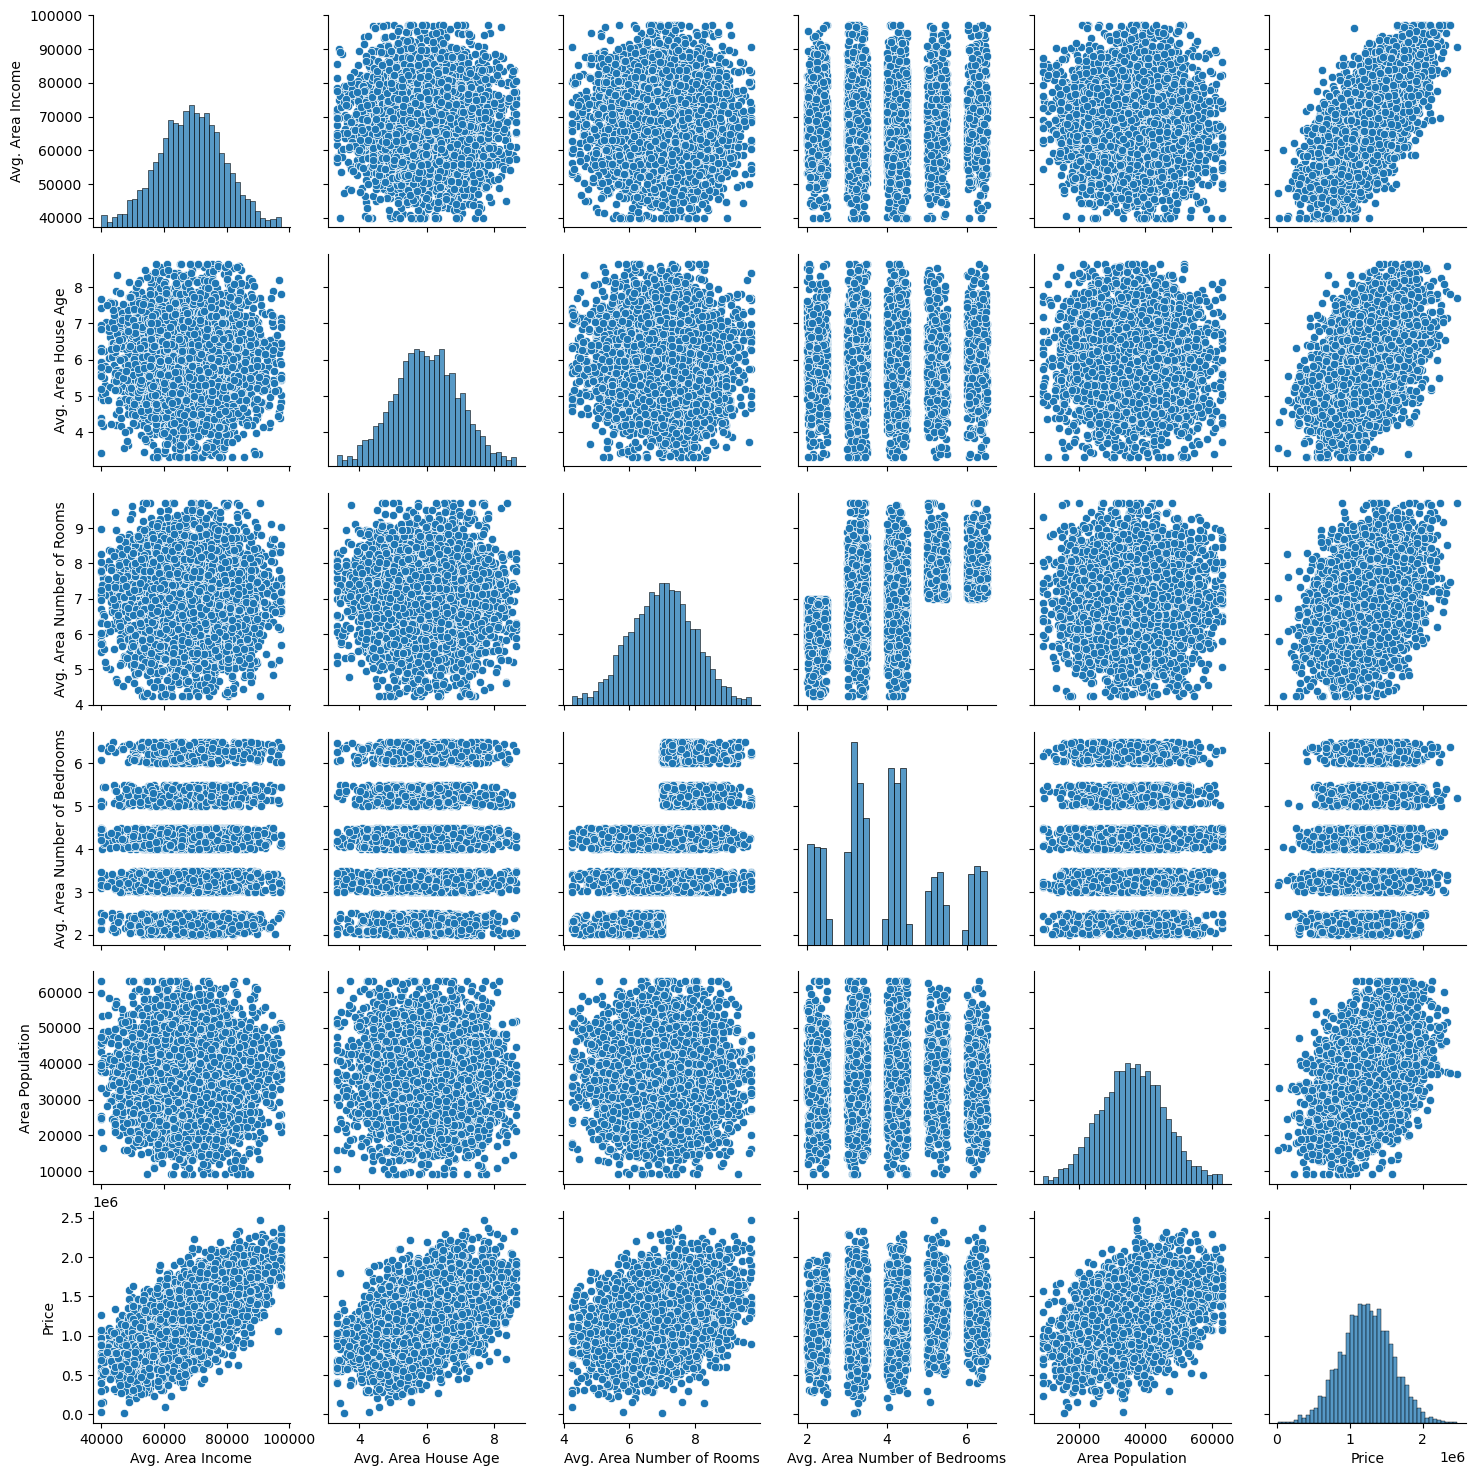

In [37]:
sns.pairplot(data)

In [38]:
#Split the data into train and test

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.3, random_state = 101)

In [39]:
from statsmodels.regression.linear_model import OLS

import statsmodels.regression.linear_model as smf

In [40]:
regression_model = smf.OLS(endog = y_train, exog = x_train).fit()

In [41]:
regression_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.964
Model:                            OLS   Adj. R-squared (uncentered):              0.964
Method:                 Least Squares   F-statistic:                          1.869e+04
Date:                Mon, 15 Apr 2024   Prob (F-statistic):                        0.00
Time:                        13:21:44   Log-Likelihood:                         -48364.
No. Observations:                3500   AIC:                                  9.674e+04
Df Residuals:                    3495   BIC:                                  9.677e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Avg. Area Income                10.1311      0.324     31.222      0.000       9.495      10.767
Avg. Area House Age           4.992e+04   3621.070     13.786      0.000    4.28e+04     5.7e+04
Avg. Area Number of Rooms    -9333.4680   3950.345     -2.363      0.018   -1.71e+04   -1588.252
Avg. Area Number of Bedrooms  3758.5178   3769.248      0.997      0.319   -3631.631    1.11e+04
Area Population                  8.4460      0.396     21.315      0.000       7.669       9.223
==============================================================================
Omnibus:                        0.352   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.839   Jarque-Bera (JB):                0.404
Skew:                          -0.002   Prob(JB):                        0.817
Kurtosis:                       2.947   Cond. No.                     9.32e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 9.32e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
regression_model = smf.OLS(endog = y_test, exog = x_test).fit()
regression_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.965
Model:                            OLS   Adj. R-squared (uncentered):              0.965
Method:                 Least Squares   F-statistic:                              8180.
Date:                Mon, 15 Apr 2024   Prob (F-statistic):                        0.00
Time:                        13:21:44   Log-Likelihood:                         -20725.
No. Observations:                1500   AIC:                                  4.146e+04
Df Residuals:                    1495   BIC:                                  4.149e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Avg. Area Income                10.5159      0.494     21.305      0.000       9.548      11.484
Avg. Area House Age           5.453e+04   5270.210     10.347      0.000    4.42e+04    6.49e+04
Avg. Area Number of Rooms    -1.159e+04   5922.698     -1.956      0.051   -2.32e+04      31.902
Avg. Area Number of Bedrooms  5831.3860   5716.597      1.020      0.308   -5382.016     1.7e+04
Area Population                  7.3343      0.597     12.279      0.000       6.163       8.506
==============================================================================
Omnibus:                        0.699   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.705   Jarque-Bera (JB):                0.638
Skew:                          -0.048   Prob(JB):                        0.727
Kurtosis:                       3.033   Cond. No.                     9.36e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 9.36e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

LinearRegression()

In [45]:
y_pred_test = linear_model.predict(x_test)

In [46]:
y_pred_train = linear_model.predict(x_train)

In [47]:
from sklearn.metrics import r2_score

In [48]:
print("Trainning Accuracy :", r2_score(y_train, y_pred_train))
print("Trainning Accuracy :", r2_score(y_test, y_pred_test))

Trainning Accuracy : 0.9171467174335061
Trainning Accuracy : 0.9168802367670309


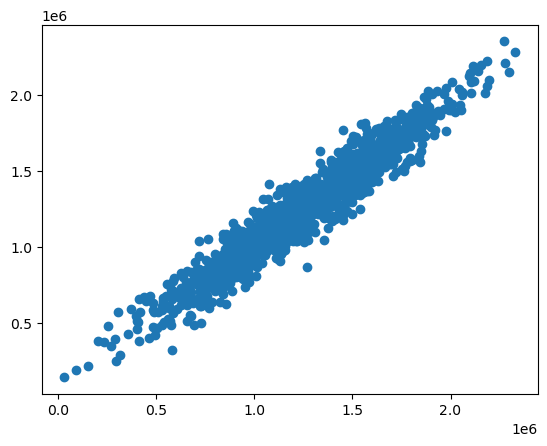

In [49]:
#Linearity
plt.scatter(y_test, y_pred_test)

<Axes: ylabel='Density'>

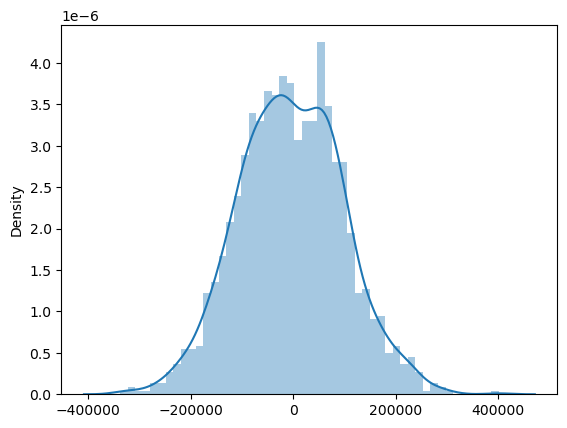

In [50]:
#Residual - Normality
sns.distplot((y_test - y_pred_test), bins = 50)

## Elastic Net

In [51]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet(alpha = 0.1, l1_ratio = 0.3)
elastic.fit(x_train, y_train)

ElasticNet(alpha=0.1, l1_ratio=0.3)

In [52]:
y_pred_train_el = elastic.predict(x_train)
y_pred_test_el = elastic.predict(x_test)

In [53]:
print("Accuracy Training :", r2_score(y_train, y_pred_train_el))
print("Accuracy Testing :", r2_score(y_test, y_pred_test_el))

Accuracy Training : 0.9155165223384557
Accuracy Testing : 0.9150849538819203


## Measurements

In [54]:
from sklearn import metrics

In [55]:
print("MAE :", metrics.mean_absolute_error(y_test, y_pred_test))

MAE : 82042.67735264859


In [56]:
print("MAPE :", metrics.mean_absolute_percentage_error(y_test, y_pred_test)*100)

MAPE : 7.864591290349164


In [57]:
print("MSE :", metrics.mean_squared_error(y_test, y_pred_test))

MSE : 10372006404.110224


In [58]:
print("RMAE :", np.sqrt(metrics.mean_absolute_error(y_test, y_pred_test)))

RMAE : 286.4309294623201


## Gradient Descent Optimization Method

In [64]:
pd.DataFrame(x_scaler).head()

,0,1,2,3,4
0,1.034822,-0.298541,0.021527,0.088062,-1.325622
1,1.006797,0.025747,-0.256355,-0.722301,0.407049
2,-0.689128,-0.113082,1.522445,0.930840,0.073326
3,-0.494796,1.226822,-1.398453,-0.584540,-0.187484
4,-0.812333,-0.949376,0.850279,0.201513,-0.994293


In [59]:
from sklearn.linear_model import SGDRegressor

In [60]:
sgd = SGDRegressor()
sgd.fit(x_train, y_train)

SGDRegressor()

In [61]:
y_pred_train_sgd = sgd.predict(x_train)
y_pred_test_sgd = sgd.predict(x_test)

In [62]:
print("Accuracy Training :", r2_score(y_train, y_pred_train_sgd))
print("Accuracy Testing :", r2_score(y_test, y_pred_test_sgd))

Accuracy Training : -7.615596537628205e+23
Accuracy Testing : -7.587877428613968e+23
